## Hypothesis Testing Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Business Problem 1

In [2]:
Loans=pd.read_csv("LoansData.csv")
Loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
Loans.columns = Loans.columns.str.replace('.','_')

C:\Users\Harsh Vardhan\AppData\Local\Temp\ipykernel_11016\3705713070.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Loans.columns = Loans.columns.str.replace('.','_')


In [4]:
Loans.Interest_Rate = pd.to_numeric(Loans.Interest_Rate.str.replace('%',''))
Loans.Loan_Length = pd.to_numeric(Loans.Loan_Length.str.replace(' months',''))

In [5]:
Fico = Loans.FICO_Range.str.split('-',expand=True).astype('float64')
Fico.columns = ('Low','High')
Loans['Fico'] = (Fico.Low + Fico.High)/2

In [6]:
Loans.dropna(inplace=True)

###  a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [7]:
# Ho: Intrest rate is not varied for different loan amounts, Not different
# Ha: Intrest rate is varied for different loan amounts, Different
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule: if p is low; null will go, if p is high; null will fly

# perform the test :correlation test (pearsonR test)

stats.pearsonr(Loans.Interest_Rate,Loans.Amount_Funded_By_Investors)

(0.33159553110364515, 5.064256950483673e-63)

### b. Loan length is directly effecting interest rate.

In [8]:
# Ho: No correlation, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule: if p is low; null will go, if p is high null will fly

# perform the test: correlation test (pearsonR test)

stats.pearsonr(Loans.Interest_Rate,Loans.Loan_Length)

(0.42505738230947654, 1.7938010673370282e-106)

### c. Interest rate varies for different purpose of loans

In [9]:
# data prep.
#samples for each loan purposes-

s1 = Loans.loc[Loans.Loan_Purpose == 'debt_consolidation','Interest_Rate'].dropna()
s2 = Loans.loc[Loans.Loan_Purpose == 'credit_card','Interest_Rate'].dropna()
s3 = Loans.loc[Loans.Loan_Purpose == 'other','Interest_Rate'].dropna()
s4 = Loans.loc[Loans.Loan_Purpose == 'moving','Interest_Rate'].dropna()
s5 = Loans.loc[Loans.Loan_Purpose == 'car','Interest_Rate'].dropna()
s6 = Loans.loc[Loans.Loan_Purpose == 'vacation','Interest_Rate'].dropna()
s7 = Loans.loc[Loans.Loan_Purpose == 'home_improvement','Interest_Rate'].dropna()
s8 = Loans.loc[Loans.Loan_Purpose == 'house','Interest_Rate'].dropna()
s9 = Loans.loc[Loans.Loan_Purpose == 'major_purchase','Interest_Rate'].dropna()
s10 = Loans.loc[Loans.Loan_Purpose == 'educational','Interest_Rate'].dropna()
s11 = Loans.loc[Loans.Loan_Purpose == 'medical','Interest_Rate'].dropna()
s12 = Loans.loc[Loans.Loan_Purpose == 'wedding','Interest_Rate'].dropna()
s13 = Loans.loc[Loans.Loan_Purpose == 'small_business','Interest_Rate'].dropna()
s14 = Loans.loc[Loans.Loan_Purpose == 'small_business','Interest_Rate'].dropna()

In [10]:
# Ho: samples are from same population
# Ha: samples are from different population
   
# CI: 95%
# p: 1-CI = 0.05
  
# rejection rule: if p is low, null will go, if p is high, null will fly

# perform the test: Annova test

stats.f_oneway( s1, s2, s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14 )

F_onewayResult(statistic=7.13356625879892, pvalue=8.074920725223914e-14)

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [11]:
#Data prep.

s1 = Loans.loc[Loans.Home_Ownership == 'MORTGAGE','Fico']
s2 = Loans.loc[Loans.Home_Ownership == 'RENT','Fico']
s3 = Loans.loc[Loans.Home_Ownership == 'OWN','Fico']
s4 = Loans.loc[Loans.Home_Ownership == 'OTHER','Fico']

In [12]:
# Ho: Relation
# Ha: No Relation
   
# CI: 95%
# p: 1-CI = 0.05
  
# rejection rule: if p is low, null will go, if p is high, null will fly

# perform the test: Anova test
stats.f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=20.65464665222211, pvalue=3.2682005447315283e-13)

## BUSINESS PROBLEM - 2

In [13]:
prices = pd.read_csv('Price_Quotes.csv')
prices

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [14]:
# print the avg/mean of the samples

print( 'mean of Barry price:', round(prices.Barry_Price.mean(), 2) )
print( 'mean of Mary price: ', round(prices.Mary_Price.mean(), 2) )

mean of Barry price: 124.33
mean of Mary price:  114.75


### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [15]:
# Ho: Relation
# Ha: No Relation

# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if p is low; null will go, if p is high; null will fly

# perform the test: t-test
stats.ttest_rel(prices.Barry_Price,prices.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

## BUSINESS PROBLEM-3

In [16]:
Treat = pd.read_csv('Treatment_Facility.csv')
Treat.rename(columns=({'VAR4':'TRFF','VAR5':'CI'}),inplace=True)
Treat

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [17]:
# Ho: Relation
# Ha: No Relation

# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if p is low; null will go, if p is high; null will fly

# perform the test: t-test

s1 = Treat.loc[Treat.Reengineer=='Prior','CI']
s2 = Treat.loc[Treat.Reengineer=='Post','CI']
stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

## BUSINESS PROBLEM-4

In [18]:
prior = pd.read_csv('Priority_Assessment.csv')
prior 

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [19]:
# Ho: Relation
# Ha: No Relation
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if  p is low; null will go, if p is high; null will fly

# perform the test: ANOVA test

s1 = prior.loc[prior.Priority=='High','Days']
s2 = prior.loc[prior.Priority=='Medium','Days']
s3 = prior.loc[prior.Priority=='Low','Days']

stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

## BUSINESS PROBLEM-5


In [20]:
Films = pd.read_csv('Films.csv')
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [21]:
#Data preperation

Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [22]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [23]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [24]:
Films.Gender=np.where((Films.Gender=='Female')|(Films.Gender=='1'),'Female','Male')

In [25]:
Films.Gender.value_counts()

Male      207
Female    123
Name: Gender, dtype: int64

In [26]:
Films.Marital_Status.value_counts()


2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [27]:
Films.Marital_Status=np.where((Films.Marital_Status=='Married')|(Films.Marital_Status=='1'),'Married','Single')
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [28]:
#Missing Value Imputation

In [29]:
Films['Marital_Status'] =Films['Marital_Status'].fillna(Films['Marital_Status'].mode())
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode())
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode())
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode())
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode())
Films['Income'] = Films['Income'].fillna(Films['Income'].mode())
Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode())

#### What is the overall level of customer satisfaction?

In [30]:
Over_all = pd.DataFrame(Films.groupby('Overall').Overall.count())
Over_all['Percent'] = Over_all.values/Films.Overall.sum().round(2)
Over_all

,Overall,Percent
Overall,,
1.0,151,0.284369
2.0,160,0.301318
3.0,12,0.022599
4.0,1,0.001883
5.0,4,0.007533


#### What factors are linked to satisfaction?

In [31]:
# Ho: Relation
# Ha: No Relation
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if  p is low; null will go, if p is high; null will fly

# perform the test: ANOVA test

s1 = Films.Sinage.dropna()
s2 = Films.Parking.dropna()
s3 = Films.Clean.dropna()
s4 = Films.Overall.dropna()

stats.f_oneway(s3,s2,s4)

F_onewayResult(statistic=2.824020764284959, pvalue=0.059849988043050875)

### What is the demographic profile of Film on the Rocks patrons?

In [32]:
Gender= Films.Gender.value_counts()
Gender

Male      207
Female    123
Name: Gender, dtype: int64

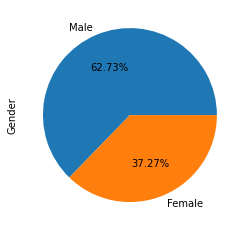

In [33]:
Gender.plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [34]:
MaritalStatus= Films.Marital_Status.value_counts()
MaritalStatus

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [35]:
Age= Films.Age.value_counts()
Age

2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

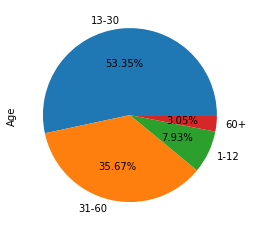

In [36]:
Age.plot(kind='pie',labels=['13-30','31-60','1-12','60+'],autopct='%1.2f%%')
plt.show()

### In what media outlet(s) should the film series be advertised?


In [37]:
Channel=Films.Hear_About.value_counts()
Channel

5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

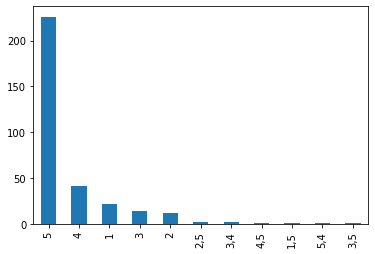

In [38]:
Channel.plot(kind='bar')
plt.show

## End of Assignment 5 Hypothesis Testing